# Estatística Aplicada à Computação.
# Projeto I : Análise de Atividades Policiais em Rhode Island.




# 2ª Projeto.

# 1) Preparação dos dados para a análise

 Antes de iniciar sua análise, é fundamental que você primeiro examine e limpe o conjunto de dados, para tornar o trabalho com ele um processo mais eficiente. Nesta parte, você praticará a correção de tipos de dados, manipulação de valores ausentes e eliminação de colunas e linhas enquanto aprende sobre o conjunto de dados do Stanford Open Policing Project.


 a) Importe o dataset police.csv, e indique quantas variáveis estão disponíveis e quantos registros policiais estão catalogados;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe_police = pd.read_csv('Downloads\police.csv')
dataframe_police

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [3]:
variaveis_police = dataframe_police.info()
variaveis_police

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

 b) Conte o número de dados faltosos de cada variável;


In [4]:
faltante = pd.DataFrame(dataframe_police.isnull().sum())

In [5]:
faltante

,0
state,0
stop_date,0
stop_time,0
county_name,91741
driver_gender,5205
driver_race,5202
violation_raw,5202
violation,5202
search_conducted,0
search_type,88434


 c) Como estamos trabalhando somente com dados de um único estado, não faz sentido mantermos informações de variáveis como county_name e state. Exclua essas variáveis do conjunto;


In [6]:
dataframe_police.drop("county_name",axis = 1,inplace = True)

In [7]:
dataframe_police.head(4)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1


d) Durante as análises, a coluna driver_gender será crítica para muitas de suas análises. Como apenas uma pequena fração das linhas está faltando driver_gender, remova essas linhas do conjunto de dados;

In [8]:
dataframe_police.dropna(subset=["driver_gender"],inplace=True)

In [9]:
dataframe_police.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

e) Vá na descrição dos dados e verifique que tipo de variável são search_conducted, is_arrested e district; depois compare com os tipos de dados que estão armazenados no conjunto de dados. Havendo necessidade, faça a modificação dos tipos de dados para essas variáveis;

In [10]:
dataframe_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               86536 non-null  object
 1   stop_date           86536 non-null  object
 2   stop_time           86536 non-null  object
 3   driver_gender       86536 non-null  object
 4   driver_race         86536 non-null  object
 5   violation_raw       86536 non-null  object
 6   violation           86536 non-null  object
 7   search_conducted    86536 non-null  bool  
 8   search_type         3307 non-null   object
 9   stop_outcome        86536 non-null  object
 10  is_arrested         86536 non-null  object
 11  stop_duration       86536 non-null  object
 12  drugs_related_stop  86536 non-null  bool  
 13  district            86536 non-null  object
dtypes: bool(2), object(12)
memory usage: 8.7+ MB


search_conducted = bool está correto!

is arrested = objct está incorreto!

disctrict = object está correto!

In [11]:
dataframe_police["is_arrested"] = dataframe_police["is_arrested"].astype("bool")

f) A data e a hora de cada parada de tráfego estão armazenadas em colunas separadas: stop_date e stop_time. Combine essas duas colunas em uma única coluna, nomeandoa como stop_datetime e converta no formato data e hora (tipo datetime). Isso habilitará atributos baseados em data convenientes que usaremos posteriormente no projeto;

In [12]:
dataframe_police['stop_datetime'] = dataframe_police[['stop_date', 'stop_time']].apply(' '.join, axis=1)

In [13]:
dataframe_police["stop_datetime"] = dataframe_police["stop_datetime"].astype("datetime64")

In [14]:
dataframe_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   state               86536 non-null  object        
 1   stop_date           86536 non-null  object        
 2   stop_time           86536 non-null  object        
 3   driver_gender       86536 non-null  object        
 4   driver_race         86536 non-null  object        
 5   violation_raw       86536 non-null  object        
 6   violation           86536 non-null  object        
 7   search_conducted    86536 non-null  bool          
 8   search_type         3307 non-null   object        
 9   stop_outcome        86536 non-null  object        
 10  is_arrested         86536 non-null  bool          
 11  stop_duration       86536 non-null  object        
 12  drugs_related_stop  86536 non-null  bool          
 13  district            86536 non-null  object    

 g) Por fim, transforme a coluna stop_datetime no índice do dataframe.


In [15]:
dataframe_police = dataframe_police.set_index('stop_datetime')
dataframe_police

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,RI,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,RI,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,RI,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3


# 2) Análise do gênero sobre as infrações.


 O gênero do motorista influencia o comportamento da polícia durante uma parada no trânsito? Nesta parte, você explorará essa questão enquanto pratica filtragem, agrupamento e muito mais!

 a) Antes de comparar as infrações cometidas por cada gênero, você deve examinar as infrações cometidas por todos os motoristas para obter uma compreensão básica dos dados. Construa uma distribuição de frequências da variável violation e responda: qual a infração mais comum e a menos notificada?

In [16]:
print("FREQUÊNCIA ABSOLUTA DE INFRAÇÔES:")
infrações  = dataframe_police['violation'].value_counts().to_frame()
infrações

FREQUÊNCIA ABSOLUTA DE INFRAÇÔES:


,violation
Speeding,48423
Moving violation,16224
Equipment,10921
Other,4409
Registration/plates,3703
Seat belt,2856


In [17]:
print("FREQUÊNCIA RELATIVA DE INFRAÇÔES:")
infrações0  = dataframe_police['violation'].value_counts(normalize=True).to_frame()*100
infrações0

FREQUÊNCIA RELATIVA DE INFRAÇÔES:


,violation
Speeding,55.957058
Moving violation,18.748267
Equipment,12.620181
Other,5.094989
Registration/plates,4.279144
Seat belt,3.300361


A infração mais comum é a de Speeding(Velociade) e a menos notificada é  Seat belt(Cinto de segurança).

 b) O interesse agora é responder a seguinte questão: motoristas do sexo masculino e feminino tendem a cometer diferentes tipos de infrações de trânsito? Para isso, crie uma tabela de contingência para frequência absoluta e outra para frequência relativa, contendo a distribuição conjunta das variáveis driver_gender e violation.

In [18]:
dataframe_police['driver_gender'].value_counts()

M    62762
F    23774
Name: driver_gender, dtype: int64

In [19]:
dataframe_police['violation'].value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [20]:
print("Tabela de contingência para frequência absoluta.")
tabela_de_contingência_a = pd.crosstab(dataframe_police['driver_gender'], dataframe_police['violation'])
tabela_de_contingência_a

Tabela de contingência para frequência absoluta.


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2501,3286,707,1056,578,15646
M,8420,12938,3702,2647,2278,32777


In [21]:
print("Tabela de contingência para frequência relativa.")
tabela_de_contingência_r = pd.crosstab(dataframe_police['driver_gender'], dataframe_police['violation'],normalize=True)*100
tabela_de_contingência_r

Tabela de contingência para frequência relativa.


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2.890127,3.797264,0.817001,1.220301,0.66793,18.080337
M,9.730055,14.951003,4.277988,3.058843,2.63243,37.876722


 c) Construa um gráfico de barras agrupadas para ilustrar os dados das tabelas de contingência construídas;

<AxesSubplot:xlabel='driver_gender'>

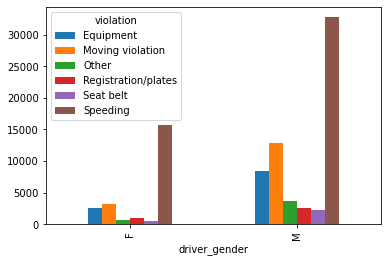

In [22]:
tabela_de_contingência_a.plot.bar()

<AxesSubplot:xlabel='driver_gender'>

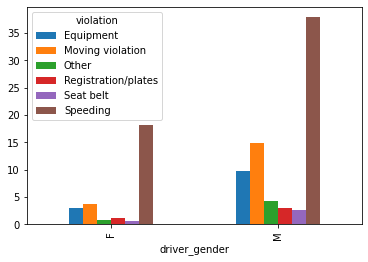

In [23]:
tabela_de_contingência_r.plot.bar()

 d) Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que o gênero influencia se o motorista receberá uma multa ou um aviso. Você pode encontrar evidências disso no conjunto de dados? Para tentar responder essa pergunta, crie uma tabela de contingência considerando as variáveis driver_gender e stop_outcome e então vai comparar a porcentagem de paradas resultados de uma "Citation"versus um "Warning"(veja o link que descreve as variáveis caso tenha dúvidas de compreensão);


In [24]:
print("Tabela de contingência.")
tabela_de_contingência = pd.crosstab(dataframe_police['driver_gender'], dataframe_police['stop_outcome'],normalize=True)*100
tabela_de_contingência

Tabela de contingência.


stop_outcome,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning
driver_gender,,,,,,
F,0.642507,0.130581,24.557410,0.194139,0.232273,1.716049
M,2.518027,0.265785,64.528058,0.507303,0.488814,4.219053


Analisando e comparando temos mais que o dobro de citation e também em warning.

e) O gênero afeta a escolha de veículos a serem revistados? Para responder essa pergunta, primeiro, calcule a porcentagem de todas as paradas no DataFrame que resultam em uma revista de veículo;


In [25]:
grup = dataframe_police.groupby(['driver_gender', 'search_conducted']).size().unstack()
grup

search_conducted,False,True
driver_gender,,
F,23318,456
M,59911,2851


 f) Em seguida, filtre o DataFrame por gênero e calcule a taxa de pesquisa para cada grupo separadamente. Dica: você executará o mesmo cálculo para ambos os gêneros ao mesmo tempo usando groupby;

In [26]:
group2 = dataframe_police.groupby('driver_gender').size()
group2

driver_gender
F    23774
M    62762
dtype: int64

 g) Considere agora a hipótese de que a taxa de revista varia de acordo com o tipo de infração, e a diferença na taxa de revista entre homens e mulheres é porque eles tendem a cometer infrações diferentes. Calcule a taxa de infração para cada combinação de gênero e infração. Homens e mulheres são revistados com a mesma taxa para cada infração?

In [27]:
tabela_de_contingência = pd.crosstab(dataframe_police['driver_gender'], dataframe_police['violation'])

In [28]:
tabela_de_contingência.loc['Total',:]= tabela_de_contingência.sum(axis=0)
tabela_de_contingência.loc[:,'Total'] = tabela_de_contingência.sum(axis=1)
tabela_de_contingência

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,Total
driver_gender,,,,,,,
F,2501.0,3286.0,707.0,1056.0,578.0,15646.0,23774.0
M,8420.0,12938.0,3702.0,2647.0,2278.0,32777.0,62762.0
Total,10921.0,16224.0,4409.0,3703.0,2856.0,48423.0,86536.0


# 3. Análise exploratória visual dos dados

 É mais provável que você seja preso em uma determinada hora do dia? As paradas relacionadas às drogas estão aumentando? Nesta parte, você responderá a essas e outras questões analisando o conjunto de dados visualmente, uma vez que os gráficos podem ajudá-lo a entender as tendências de uma forma que o exame dos dados brutos não pode.

 a) Quando um policial para um motorista, uma pequena porcentagem dessas paradas termina em uma prisão. Isso é conhecido como taxa de prisão. Você descobrirá se a taxa de prisão varia de acordo com a hora do dia. Primeiro, você calculará a taxa de prisão em todas as paradas no DataFrame, calculando a média da coluna is_arrested;

In [29]:
dataframe_police['is_arrested'].mean()

0.0355690117407784

 b) Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice. A hora varia de 0 a 23, considerando que 0 é meia noite e 12h é meio dia. Para isso, agrupe (usando groupby) pelo atributo de hora do índice do DataFrame, calculando a média dos valores agrupados. No final crie uma nova variável hourly_arrest_rate com os valores encontrados da taxa de prisão por hora;

In [30]:
dataframe_police=dataframe_police.reset_index()

In [31]:
dataframe_police['hourly_arrest_rate'] = dataframe_police.groupby(by=dataframe_police['stop_datetime'].dt.hour,
                                                                  sort=False)['is_arrested'].sum()
df_arr = dataframe_police.dropna(subset=['hourly_arrest_rate'])

 c) Agora crie um gráfico de linha mostrando a variável hourly_arrest_rate, colocando o rótulo Horas no eixo-x, e Taxa de Prisões, no eixo-y, e o título de Taxa de Prisões por Hora do Dia;


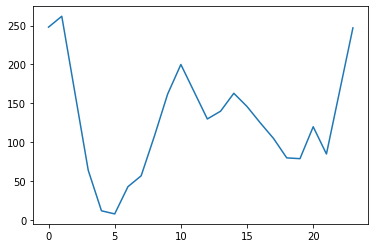

In [32]:
plt.plot(df_arr['hourly_arrest_rate'])

 d) Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Agora, você avaliará se essas interrupções relacionadas à drogas estão se tornando mais comuns com o tempo. A coluna booleana drug_related_stop indica se drogas foram encontradas durante uma determinada parada. Você calculará a taxa anual de drogas reamostrando essa coluna e, em seguida, usará um gráfico de linha para visualizar como a taxa mudou ao longo do tempo;

In [33]:
dataframe_police['Annual_drug_rate'] = dataframe_police.groupby(by=dataframe_police['stop_datetime'].dt.year,
                                                                  sort=False)['drugs_related_stop'].sum()

In [34]:
df_arr=dataframe_police.dropna(subset=["Annual_drug_rate"])

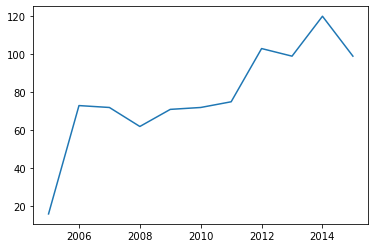

In [35]:
plt.plot(df_arr["Annual_drug_rate"])

 e) Ainda falando sobre drogas, consideremos a hipótese de que, o aumento ou a diminuição das apreensões de drogas estão associadas ao aumento ou diminuição das abordagens políciais, ou seja, mais abordagens, geram mais apreensões e menos abordagens, menos apreensões de drogas. Podemos testar essa hipótese calculando a taxa de abordagens anual e, em seguida, comparando-a com a taxa anual de medicamentos. Se a hipótese for verdadeira, você verá que ambas as taxas aumentam com o tempo. Para isso, calcule a taxa de pesquisa anual reamostrando a coluna search_conducted e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e Annual_search_rate ao longo do eixo das colunas e gere gráficos de linha para os dados desse resultado da concatenação;

In [36]:
dataframe_police['Annual_search_rate'] = dataframe_police.groupby(by=dataframe_police['stop_datetime'].dt.year,
                                                                  sort=False)['search_conducted'].sum()

In [37]:
df_arr=dataframe_police.dropna(subset=["Annual_search_rate"])
df_arr["Annual_search_rate"]

2005    121.0
2006    420.0
2007    398.0
2008    333.0
2009    358.0
2010    320.0
2011    275.0
2012    349.0
2013    227.0
2014    276.0
2015    230.0
Name: Annual_search_rate, dtype: float64

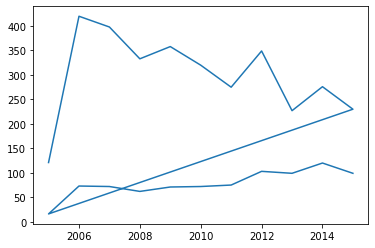

In [38]:
tabela2 = pd.concat([df_arr['Annual_search_rate'], df_arr['Annual_drug_rate']])
plt.plot(tabela2)

 f) O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos como zonas. Como as zonas se comparam em termos de quais infrações são detectadas pela polícia? Para isso, crie uma distribuição conjunta entre as variáveis district e violation, usando uma tabela de contingência. Depois, selecione as linhas das zonas ’Zona K1’ a ’Zona K3’, gere um gráfico de barras agrupadas que ilustre os resultados obtido na tabela, e responda a questão colocada.

In [39]:
tabela= dataframe_police.groupby(['district','violation']).size().unstack(1)
tabela.loc['Total',:]= tabela.sum(axis=0)
tabela.loc[:,'Total'] = tabela.sum(axis=1)
tabela

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,Total
district,,,,,,,
Zone K1,672.0,1254.0,290.0,120.0,NaN,5960.0,8296.0
Zone K2,2061.0,2962.0,942.0,768.0,481.0,10448.0,17662.0
Zone K3,2302.0,2898.0,705.0,695.0,638.0,12322.0,19560.0
Zone X1,296.0,671.0,143.0,38.0,74.0,1119.0,2341.0
Zone X3,2049.0,3086.0,769.0,671.0,820.0,8779.0,16174.0
Zone X4,3541.0,5353.0,1560.0,1411.0,843.0,9795.0,22503.0
Total,10921.0,16224.0,4409.0,3703.0,2856.0,48423.0,86536.0


<AxesSubplot:xlabel='district'>

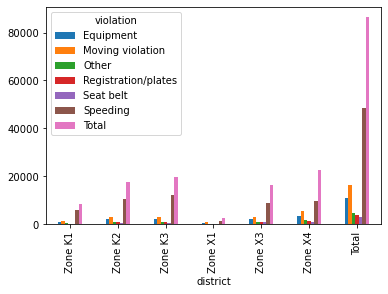

In [40]:
tabela.plot.bar()

# 4. Analisando o efeito do clima no policiamento


 Nesta última parte, você usará um segundo conjunto de dados, weather.csv, para explorar o impacto das condições meteorológicas no comportamento da polícia durante as paradas de trânsito. Você vai praticar mesclar e remodelar conjuntos de dados, avaliando se uma fonte de dados é confiável, trabalhando com dados categóricos e outras habilidades avançadas.

In [41]:
dataframe_weather = pd.read_csv('Downloads\weather.csv')
dataframe_weather

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


a) Comece explorando as temperaturas apresentadas no conjunto de dados: carregue o conjunto, selecione as variáveis relativas à temperatura (TMIN, TAVG, TMAX), imprima as principais medidas resumo usando o comando describe e plote os três boxplots dessas variáveis em um mesmo gráfico. O que você poderia comentar sobre as temperaturas, com base nos resultados obtidos? PS.: ao decidir se os valores parecem razoáveis, lembre-se de que a temperatura é medida em graus Fahrenheit, não Celsius!

In [42]:
dataframe_temp = dataframe_weather[['TMIN','TAVG','TMAX']]
dataframe_temp

,TMIN,TAVG,TMAX
0,35,44.0,53
1,28,36.0,44
2,44,49.0,53
3,39,42.0,45
4,28,36.0,43
...,...,...,...
4012,44,51.0,61
4013,30,40.0,44
4014,28,33.0,40
4015,27,30.0,35


In [43]:
print("Media TMIN:",dataframe_temp['TMIN'].mean())
print("Mediana TMIN:",dataframe_temp['TMIN'].median())
print("Moda TMIN:",dataframe_temp['TMIN'].mode())

Media TMIN: 43.48444112521783
Mediana TMIN: 44.0
Moda TMIN: 0    63
dtype: int64


In [44]:
print("Media TAVG:",dataframe_temp['TAVG'].mean())
print("Mediana TAVG:",dataframe_temp['TAVG'].median())
print("Moda TAVG:",dataframe_temp['TAVG'].mode())

Media TAVG: 52.49301561216105
Mediana TAVG: 54.0
Moda TAVG: 0    53.0
dtype: float64


In [45]:
print("Media TMAX:",dataframe_temp['TMAX'].mean())
print("Mediana TMAX:",dataframe_temp['TMAX'].median())
print("Moda TMAX:",dataframe_temp['TMAX'].mode())

Media TMAX: 61.26860841423948
Mediana TMAX: 62.0
Moda TMAX: 0    81
dtype: int64


In [46]:
dataframe_temp.describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


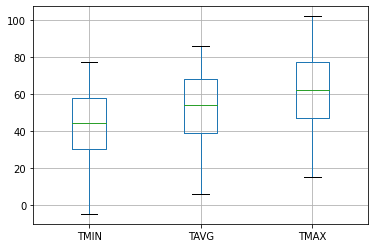

In [47]:
boxplot = dataframe_temp.boxplot()
boxplot.plot()
plt.show()

Analisando as variáveis relativas à temperatura (TMIN, TAVG, TMAX),obtemos uma temperatura média minima de 43° Fahrenheit, média total de 53° Fahrenheit e uma média maxima de 61° Fahrenheit.

 b) Para a variável TDIFF, que representa a diferença entre as temperaturas, apresente as medidas resumo e plote um histograma para essa variável. O que pode dizer sobre a distribuição de dados?

In [48]:
TDIFF = dataframe_temp["TMAX"] - dataframe_temp["TMIN"]

In [49]:
print("Media TDIFF:",TDIFF.mean())
print("Mediana TDIFF:",TDIFF.median())
print("Moda TDIFF:",TDIFF.mode())

Media TDIFF: 17.784167289021656
Mediana TDIFF: 18.0
Moda TDIFF: 0    19
dtype: int64


<AxesSubplot:ylabel='Frequency'>

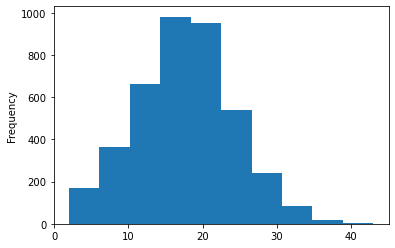

In [50]:
TDIFF.plot.hist()

Observamos que a diferença entre as temperaturas  ( TMAX - TMIN ) tem uma média de 17.7° F, uma mediana de 18° F e uma moda de 19° F.

 c) Você agora preparará os DataFrames das abordagens de trânsito e de classificação do clima (o dessa sessão) para que estejam prontos para serem mesclados. No DataFrame sobre abordagens no trânsito, você transformará o índice stop_datetime para uma coluna (reset_index), pois o índice será perdido durante a mesclagem. Com o DataFrame meteorológico, selecione as colunas DATE e rating e coloque em um novo dataframe;

df_arr['hourly_arrest_rate']

In [51]:
df_new = dataframe_police.join(dataframe_weather)
df_new

,stop_datetime,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,2005-02-20 17:15:00,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86531,2015-12-31 21:21:00,RI,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86532,2015-12-31 21:59:00,RI,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86533,2015-12-31 22:04:00,RI,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86534,2015-12-31 22:09:00,RI,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
dataFrame_date_rating = pd.concat([df_new['DATE'],df_new['hourly_arrest_rate']],axis=1)
pd.DataFrame(dataFrame_date_rating)

,DATE,hourly_arrest_rate
0,2005-01-01,248.0
1,2005-01-02,262.0
2,2005-01-03,163.0
3,2005-01-04,64.0
4,2005-01-05,12.0
...,...,...
86531,NaN,NaN
86532,NaN,NaN
86533,NaN,NaN
86534,NaN,NaN


d) Agora, mescle os dataframes gerados em um novo dataframe, unidos usando a coluna stop_date de do dataframe policial e a coluna DATE do novo dataframe gerado a partirdos dados meteorológicos. Assim que a mesclagem for concluída, defina stop_datetime novamente como o índice;

In [53]:
dataFrame_date_ratings = pd.concat([dataFrame_date_rating,dataframe_police['stop_datetime']],axis=1)

In [54]:
dataFrame_date_ratings

,DATE,hourly_arrest_rate,stop_datetime
0,2005-01-01,248.0,2005-01-04 12:55:00
1,2005-01-02,262.0,2005-01-23 23:15:00
2,2005-01-03,163.0,2005-02-17 04:15:00
3,2005-01-04,64.0,2005-02-20 17:15:00
4,2005-01-05,12.0,2005-02-24 01:20:00
...,...,...,...
86531,NaN,NaN,2015-12-31 21:21:00
86532,NaN,NaN,2015-12-31 21:59:00
86533,NaN,NaN,2015-12-31 22:04:00
86534,NaN,NaN,2015-12-31 22:09:00


In [55]:
dataFrame_date_ratings = dataFrame_date_ratings.set_index('stop_datetime')
dataFrame_date_ratings

,DATE,hourly_arrest_rate
stop_datetime,,
2005-01-04 12:55:00,2005-01-01,248.0
2005-01-23 23:15:00,2005-01-02,262.0
2005-02-17 04:15:00,2005-01-03,163.0
2005-02-20 17:15:00,2005-01-04,64.0
2005-02-24 01:20:00,2005-01-05,12.0
...,...,...
2015-12-31 21:21:00,NaN,NaN
2015-12-31 21:59:00,NaN,NaN
2015-12-31 22:04:00,NaN,NaN


e) A partir desse novo dataframe criado, levante duas questões e as responda usando qualquer técnica que ache necessária.

- É possivel apresentar as medidas resumo da variavel hourly_arrest_rate? Sim pois é uma variável do tipo float.

In [56]:
print("Media TMAX:",dataFrame_date_ratings['hourly_arrest_rate'].mean())
print("Mediana TMAX:",dataFrame_date_ratings['hourly_arrest_rate'].median())
print("Moda TMAX:",dataFrame_date_ratings['hourly_arrest_rate'].mode())

Media TMAX: 128.25
Mediana TMAX: 127.5
Moda TMAX: 0    163.0
dtype: float64


- Tem como fazer plote com esses dados?

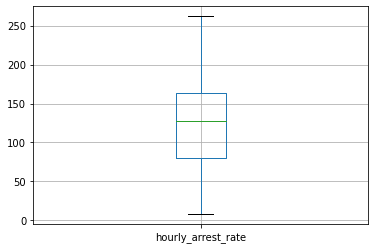

In [57]:
boxplots = dataFrame_date_ratings.boxplot()
boxplots.plot()
plt.show()